In [1]:
import numpy as np
import matplotlib.pyplot as plt

from whittle_estimator import ThomasWhittleEstimator
from spatial_pp import SPP_HomPoisson, SPP_Thomas
from minimum_contrast import MinimumContrastThomas
from palm_likelihood import PalmLikelihoodThomas

# Thomas process

## Minimum contrast estimation
### Stability of estimates

Here we run $N_{mc}$ iterations of the minimum contrast esimator, each time sampling from a Thomas process with fixed parameter values from iteration to iteration. We use a grid of 100 uniformly spaced points between 0 and 0.125 for the integration over $r$. Parameters are either sampled using a random grid search between provided bounds, or using a uniform grid between the same bounds.

In [100]:
params_arr = np.array(
    [[100, 5, 0.03],
     [50, 10, 0.03],
     [25, 20, 0.03],
    ]
)
cov = np.array([[1, 0], [0, 1]])

# Instatiate class for Thomas process
tom = SPP_Thomas()

# List for parameters
params_mc = []

# Number of repetitions
N_mc = int(250) 

# Set for grid search
rho_grid = np.arange(10, 120, 1)
sigma_grid = np.arange(0.01, 0.1, 0.01)

for p_idx in range(len(params_arr)):
    print(f"Parameter set: {p_idx}")
    # Parameter values for this run
    rho = params_arr[p_idx, 0]
    K = params_arr[p_idx, 1]
    sigma = params_arr[p_idx, 2]
    
    # Array to store inferred params for this run
    params_iter = np.zeros((N_mc, 4))
    for j in range(N_mc):
        if ((j / 50) == (j // 50)):
            print(f"Iteration: {j}")
        spp = tom.simSPP(rho, K, sigma, cov, enlarge=1.25)
        params_iter[j, 3] = len(spp)
        mct = MinimumContrastThomas(spp)
        samp_params_mc = mct.minimumContrastEstimate(
            rho_grid, sigma_grid
        )
        params_iter[j,[0,1,2]] = samp_params_mc
    params_mc.append(params_iter)

Parameter set: 0
Iteration: 0
Iteration: 50
Iteration: 100
Iteration: 150
Iteration: 200
Parameter set: 1
Iteration: 0
Iteration: 50
Iteration: 100
Iteration: 150
Iteration: 200
Parameter set: 2
Iteration: 0
Iteration: 50
Iteration: 100
Iteration: 150
Iteration: 200


In [128]:
j = 2
print(f"""
        rho mean scaled bias: {np.mean((params_mc[j][:,0]- params_arr[j,0])/params_arr[j,0])}
        K mean scaled bias: {np.mean((params_mc[j][:,1]- params_arr[j,1])/params_arr[j,1])}
        sigma mean scaled bias: {np.mean((params_mc[j][:,2]- params_arr[j,2])/params_arr[j,2])}
       """)


        rho mean scaled bias: 0.20672000000000001
        K mean scaled bias: -0.1324734195528531
        sigma mean scaled bias: -0.052
       


In [131]:
j = 2
print(f"""
        rho mean scaled bias: {np.median((params_mc[j][:,0]- params_arr[j,0])/params_arr[j,0])}
        K mean scaled bias: {np.median((params_mc[j][:,1]- params_arr[j,1])/params_arr[j,1])}
        sigma mean scaled bias: {np.median((params_mc[j][:,2]- params_arr[j,2])/params_arr[j,2])}
       """)


        rho mean scaled bias: 0.16
        K mean scaled bias: -0.13435559006211173
        sigma mean scaled bias: 0.0
       


In [23]:
rho = 50 # parent Poisson intensity
K = 10 # number of Offpsring Poisson rate
sigma = 0.03 # sd of offspring spatial distribution
cov = np.array([[1, 0], [0, 1]]) 

# Grid for integration search
rho_grid=np.linspace(10,100,100)
sigma_grid=np.linspace(0.01,0.1,10)

# Instatiate class for Thomas process
tom = SPP_Thomas()

N_mc = 500 # Number of repetitions

# Run N_mc iterations of minimum contrast and plot diagnostics
params_mc = np.zeros((N_mc, 3))
for j in range(N_mc):
    if ((j / 50) == (j // 50)):
        print(f"Iteration: {j}")
    spp = tom.simSPP(rho, K, sigma, cov, enlarge=1.25)
    mct = MinimumContrastThomas(spp)
    samp_params_mc = mct.minimumContrastEstimate(
        rho_grid=rho_grid, sigma_grid=sigma_grid
    )
    params_mc[j,:] = samp_params_mc

Iteration: 0
Iteration: 50
Iteration: 100
Iteration: 150
Iteration: 200
Iteration: 250
Iteration: 300
Iteration: 350
Iteration: 400
Iteration: 450


In [24]:
print(f"""
        rho mean scaled bias: {np.mean((params_mc[:,0]- rho)/rho)}
        K mean scaled bias: {np.mean((params_mc[:,1]- K)/K)}
        sigma mean scaled bias: {np.mean((params_mc[:,2]- sigma)/sigma)}
       """)


        rho mean scaled bias: 0.3273454545454545
        K mean scaled bias: -0.19236360621281193
        sigma mean scaled bias: -0.08666666666666646
       


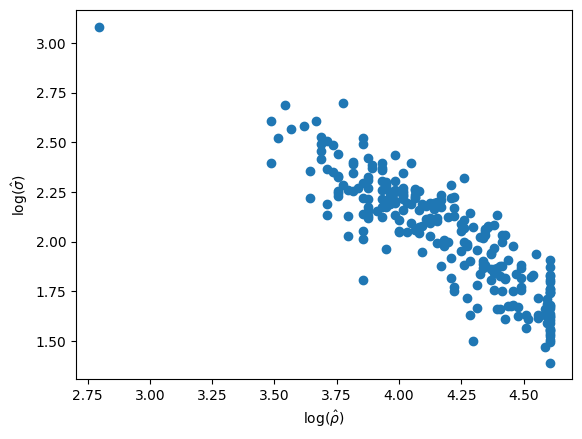

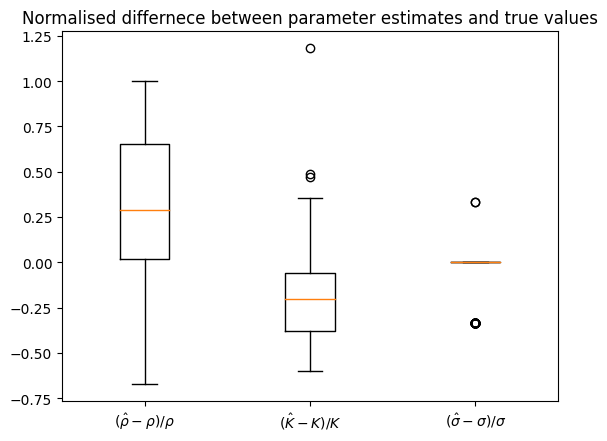

In [20]:
plt.figure(1);
plt.scatter(np.log(params_mc[:,0]), np.log(params_mc[:,1]));
plt.xlabel(r"$\log(\hat{\rho})$"); plt.ylabel(r"$\log(\hat{\sigma})$");

data = [(params_mc[:,0]- rho)/rho, (params_mc[:,1]- K)/K, (params_mc[:,2]- sigma)/sigma]
fig7, ax7 = plt.subplots()
ax7.set_title('Normalised differnece between parameter estimates and true values')
ax7.boxplot(data)
plt.xticks([1, 2, 3], [r'$(\hat{\rho} - \rho)/\rho$',
                    r'$(\hat{K} - K)/K$', 
                    r'$(\hat{\sigma} - \sigma)/\sigma$'])
plt.show()

## Palm likelihood estimation
### Stability of estimates

Here we run $N_{pl}$ iterations of the Palm likelihood esimator, each time sampling from a Thomas process with fixed parameter values from iteration to iteration. Parameters are either sampled using a random grid search between provided bounds, or using a uniform grid between the same bounds. A default value of $R = 1/4$ will be used, where $R$ is the assumed range of correlation of the process.

In [ ]:
rho = 50 # parent Poisson intensity
K = 25 # number of Offpsring Poisson rate
sigma = 0.03 # sd of offspring spatial distribution
cov = np.array([[1, 0], [0, 1]]) 

# Instatiate class for Thomas process
tom = SPP_Thomas()

N_pl = 250 # Number of repetitions

params = np.zeros((N_pl, 3))
for k in range(N_pl):
    if (((k+1) / 25) == ((k+1) // 25)):
        print(f"Run {k + 1} of {N_pl}")
    spp = tom.simSPP(rho, K, sigma, np.array([[1,0], [0, 1]]), 1.25)
    tpl = PalmLikelihoodThomas(spp, R=0.25)
    params[k, :] = (tpl.maximisePalmLikelihood(
                                rho_min=10, rho_max=50, 
                                K_min=5, K_max=20,
                                sig_min=0.01, sig_max=0.1,
                                coarseness=10,
                                random=True,
                                verbose=False))


Run 25 of 250
Run 50 of 250
Run 75 of 250
Run 100 of 250
Run 125 of 250
Run 150 of 250
Run 175 of 250
Run 200 of 250
Run 225 of 250
Run 250 of 250


In [ ]:
print(f"""
        rho mean scaled bias: {np.mean((params[:,0]- rho)/rho)}
        K mean scaled bias: {np.mean((params[:,1]- K)/K)}
        sigma mean scaled bias: {np.mean((params[:,2]- sigma)/sigma)}

       """)


        rho mean scaled bias: -0.09928128885280474
        K mean scaled bias: -0.2555644077681568
        sigma mean scaled bias: 0.05238523519307353

       


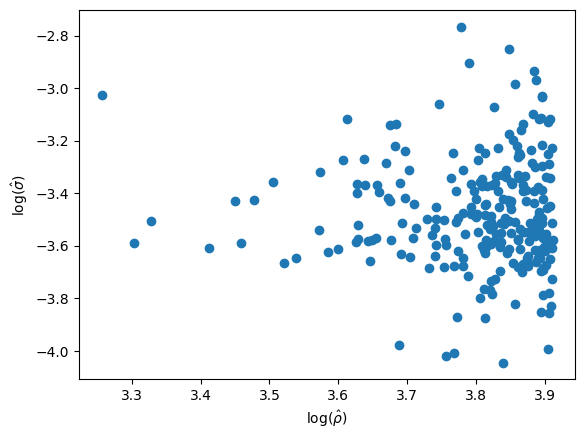

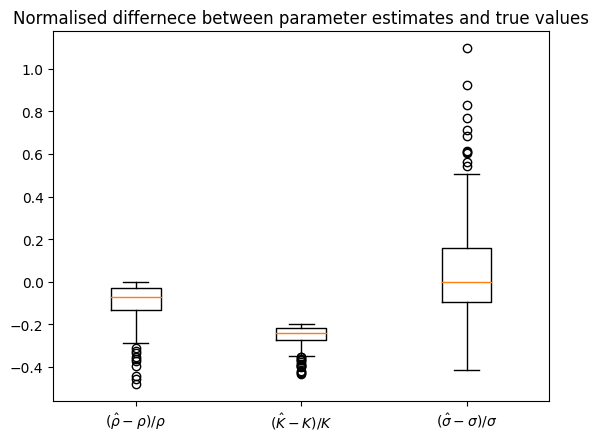

In [ ]:
plt.figure(1);
plt.scatter(np.log(params[:,0]), np.log(params[:,2]));
plt.xlabel(r"$\log(\hat{\rho})$"); plt.ylabel(r"$\log(\hat{\sigma})$");

data = [(params[:,0]- rho)/rho, (params[:,1]-K)/K, (params[:,2]- sigma)/sigma]
fig7, ax7 = plt.subplots()
ax7.set_title('Normalised differnece between parameter estimates and true values')
ax7.boxplot(data)
plt.xticks([1, 2, 3], [r'$(\hat{\rho} - \rho)/\rho$',
                      r'$(\hat{K} - K)/K$',
                      r'$(\hat{\sigma} - \sigma)/\sigma$'])
plt.show()

Sample a Thomas process

## Whittle estimation

Here we run $N_{w}$ iterations of the Whittle esimator, each time sampling from a Thomas process with fixed parameter values from iteration to iteration. Parameters are either sampled using a random grid search between provided bounds, or using a uniform grid between the same bounds.

### Using $K = N(W)/\sigma$

In [50]:
params_arr = np.array(
    [[100, 5, 0.03],
     [50, 10, 0.03],
     [25, 20, 0.03],
    ]
)
cov = np.array([[1, 0], [0, 1]])

# Instatiate class for Thomas process
tom = SPP_Thomas()

# List for parameters
params_wl = []

# Number of repetitions
N_w = int(250) 

for p_idx in range(len(params_arr)):
    print(f"Parameter set: {p_idx}")
    # Parameter values for this run
    rho = params_arr[p_idx, 0]
    K = params_arr[p_idx, 1]
    sigma = params_arr[p_idx, 2]
    
    # Array to store inferred params for this run
    params_iter = np.zeros((N_w, 6))
    for k in range(N_w):
        if (((k+1) / 25) == ((k+1) // 25)):
            print(f"Run {k + 1} of {N_w}")

        # Simulate Thomas process
        spp = tom.simSPP(rho, K, sigma, cov, enlarge=1.25)
        params_iter[k, 3] = len(spp)
        twe = ThomasWhittleEstimator(spp, -16, 16, 1)

        # Compute randomised starting parameters
        init = np.array(
            [np.random.choice(np.arange(10,100,1), 1)[0],
             np.random.choice(np.arange(0.01, 0.1, 0.01), 1)[0]]
        )
        params_iter[k,[4,5]] = init

        # Minimise the negative WL and store
        neg_ll = lambda x: -twe.computeLikelihood(rho=x[0], K=len(spp)/x[0], sigma=x[1])
        params_iter[k, [0,2]] = (twe.scipyOptimisation(neg_ll, init))
        params_iter[k, 1] = len(spp)/params_iter[k,0]
    params_wl.append(params_iter)

Parameter set: 0
Run 25 of 250
Run 50 of 250
Run 75 of 250
Run 100 of 250
Run 125 of 250
Run 150 of 250
Run 175 of 250
Run 200 of 250
Run 225 of 250
Run 250 of 250
Parameter set: 1
Run 25 of 250
Run 50 of 250
Run 75 of 250
Run 100 of 250
Run 125 of 250
Run 150 of 250
Run 175 of 250
Run 200 of 250
Run 225 of 250
Run 250 of 250
Parameter set: 2


/home/jc820/Documents/First Mini Project/Code/Spatial-Point-Processes/src/whittle_estimator.py:67: RuntimeWarning: invalid value encountered in log
  likelihood_eval[k] = (np.log(spectral_density) +


Run 25 of 250
Run 50 of 250
Run 75 of 250
Run 100 of 250
Run 125 of 250
Run 150 of 250
Run 175 of 250
Run 200 of 250
Run 225 of 250
Run 250 of 250


In [121]:
j = 2
print(f"""
        rho mean scaled bias: {np.mean((params_wl[j][:,0]- params_arr[j,0])/params_arr[j,0])}
        K mean scaled bias: {np.mean((params_wl[j][:,1]- params_arr[j,1])/params_arr[j,1])}
        sigma mean scaled bias: {np.mean((params_wl[j][:,2]- params_arr[j,2])/params_arr[j,2])}
       """)


        rho mean scaled bias: 0.11798500619473229
        K mean scaled bias: -0.10561537667809674
        sigma mean scaled bias: -0.04734017365377592
       


In [125]:
j = 0
print(f"""
        rho mean scaled bias: {np.median((params_wl[j][:,0]- params_arr[j,0])/params_arr[j,0])}
        K mean scaled bias: {np.median((params_wl[j][:,1]- params_arr[j,1])/params_arr[j,1])}
        sigma mean scaled bias: {np.median((params_wl[j][:,2]- params_arr[j,2])/params_arr[j,2])}
       """)


        rho mean scaled bias: 0.11754536353557987
        K mean scaled bias: -0.10938037005140674
        sigma mean scaled bias: -0.036779040081961575
       


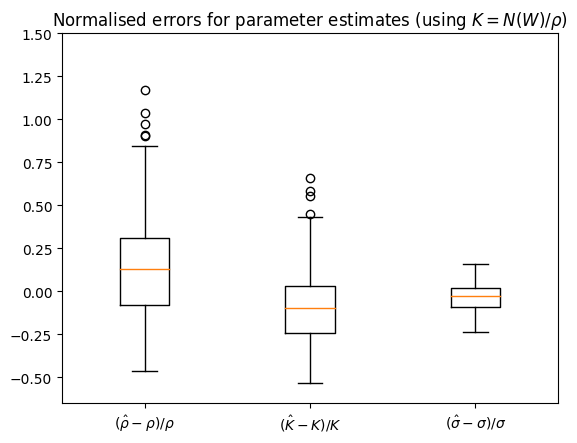

<Figure size 640x480 with 0 Axes>

In [17]:
data = [(params_2[:,0]- rho)/rho, (params_2[:,1]-K)/K, (params_2[:,2]- sigma)/sigma]
fig2, ax2 = plt.subplots()
ax2.set_title(r"""Normalised errors for parameter estimates (using $K = N(W)/\rho$)""")
ax2.boxplot(data)
plt.xticks([1, 2, 3], [r'$(\hat{\rho} - \rho)/\rho$',
                      r'$(\hat{K} - K)/K$',
                      r'$(\hat{\sigma} - \sigma)/\sigma$'])
plt.ylim([-0.65, 1.5])
# plt.savefig("Plots/Goodness of Fit Plots/normalised_diffs_box_2.pdf")
plt.show()
plt.clf()

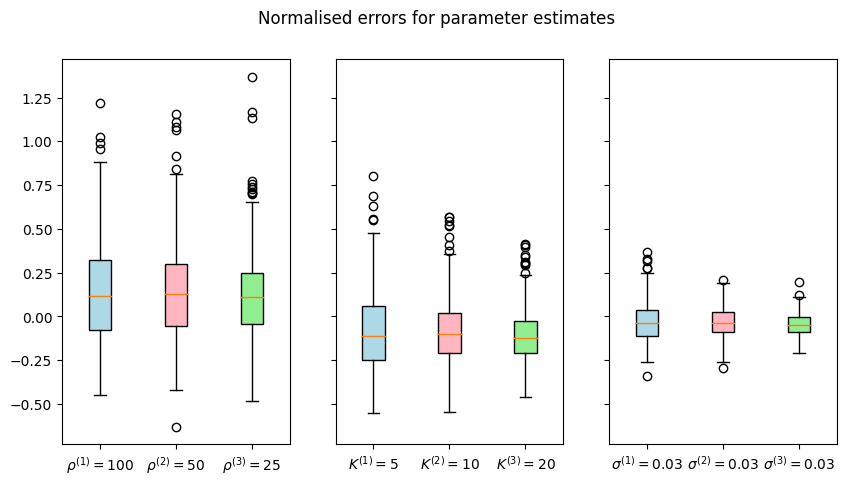

In [119]:
params_1 = params_wl[0]; params_2 = params_wl[1]; params_3 = params_wl[2]
rho_1 = params_arr[0,0]; rho_2 = params_arr[1,0]; rho_3 = params_arr[2,0]
K_1 = params_arr[0,1]; K_2 = params_arr[1,1]; K_3 = params_arr[2,1]
sigma_1 = params_arr[0,2]; sigma_2 = params_arr[1,2]; sigma_3 = params_arr[2,2]

data1 = [(params_1[:,0]- rho_1)/rho_1,
         (params_2[:,0]- rho_2)/rho_2, 
         (params_3[:,0]- rho_3)/rho_3]

data2 = [(params_1[:,1] - K_1)/K_1,
         (params_2[:,1]-K_2)/K_2, 
         (params_3[:,1]-K_3)/K_3]

data3 = [(params_1[:,2] - sigma_1)/sigma_1,
         (params_2[:,2]- sigma_2)/sigma_2,
         (params_3[:,2]- sigma_3)/sigma_3]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
bplot1 = ax1.boxplot(data1, patch_artist=True)
bplot2 = ax2.boxplot(data2, patch_artist=True)
bplot3 = ax3.boxplot(data3, patch_artist=True)
ax1.set_xticks([1, 2, 3],
           [r'$\rho^{(1)} = 100$',
            r'$\rho^{(2)} = 50$',
            r'$\rho^{(3)} = 25$']);
ax2.set_xticks([1, 2, 3],
           [r'$K^{(1)} = 5$',
            r'$K^{(2)} = 10$',
            r'$K^{(3)} = 20$']);
ax3.set_xticks([1, 2, 3],
           [r'$\sigma^{(1)} = 0.03$',
            r'$\sigma^{(2)} = 0.03$',
            r'$\sigma^{(3)} = 0.03$']);

# fill with colors
colors = ['lightblue', 'lightpink', 'lightgreen']
for bplot in (bplot1, bplot2, bplot3):
    for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)
            
fig.suptitle("""Normalised errors for parameter estimates""");
plt.savefig("Plots/Goodness of Fit Plots/side_by_side_box_3sets.pdf")

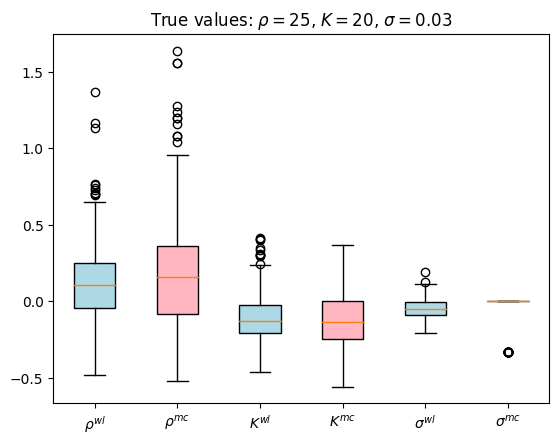

In [116]:
params_wl_1 = params_wl[0]; params_wl_2 = params_wl[1]; params_wl_3 = params_wl[2]
params_mc_1 = params_mc[0]; params_mc_2 = params_mc[1]; params_mc_3 = params_mc[2]
rho_1 = params_arr[0,0]; rho_2 = params_arr[1,0]; rho_3 = params_arr[2,0]
K_1 = params_arr[0,1]; K_2 = params_arr[1,1]; K_3 = params_arr[2,1]
sigma_1 = params_arr[0,2]; sigma_2 = params_arr[1,2]; sigma_3 = params_arr[2,2]

data1 = [(params_wl_1[:,0]- rho_1)/rho_1,
         (params_mc_1[:,0]- rho_1)/rho_1, 
         (params_wl_1[:,1]- K_1)/K_1,
         (params_mc_1[:,1]- K_1)/K_1,
         (params_wl_1[:,2]- sigma_1)/sigma_1,
         (params_mc_1[:,2]- sigma_1)/sigma_1]

data2 = [(params_wl_2[:,0]- rho_2)/rho_2,
         (params_mc_2[:,0]- rho_2)/rho_2, 
         (params_wl_2[:,1]- K_2)/K_2,
         (params_mc_2[:,1]- K_2)/K_2,
         (params_wl_2[:,2]- sigma_2)/sigma_2,
         (params_mc_2[:,2]- sigma_2)/sigma_2]

data3 = [(params_wl_3[:,0]- rho_3)/rho_3,
         (params_mc_3[:,0]- rho_3)/rho_3, 
         (params_wl_3[:,1]- K_3)/K_3,
         (params_mc_3[:,1]- K_3)/K_3,
         (params_wl_3[:,2]- sigma_3)/sigma_3,
         (params_mc_3[:,2]- sigma_3)/sigma_3]

# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5), sharey=True)

# ax1.boxplot(data1)
# ax2.boxplot(data2)
# ax3.boxplot(data3)
# ax1.set_xticks([1, 2, 3],
#            [r'$\rho^{(1)} = 100$',
#             r'$\rho^{(2)} = 50$',
#             r'$\rho^{(3)} = 25$']);
# ax2.set_xticks([1, 2, 3],
#            [r'$K^{(1)} = 5$',
#             r'$K^{(2)} = 10$',
#             r'$K^{(3)} = 20$']);
# ax3.set_xticks([1, 2, 3],
#            [r'$\sigma^{(1)} = 0.03$',
#             r'$\sigma^{(2)} = 0.03$',
#             r'$\sigma^{(3)} = 0.03$']);
            
# fig.suptitle("""Normalised errors for parameter estimates""");
# plt.savefig("Plots/Goodness of Fit Plots/side_by_side_box_3sets.pdf")

fig, ax = plt.subplots()
bplot = ax.boxplot(data3, patch_artist=True);
ax.set_xticks([1, 2, 3, 4, 5, 6],
           [r'$\rho^{wl}$',
            r'$\rho^{mc}$',
            r'$K^{wl}$',
            r'$K^{mc}$',
            r'$\sigma^{wl}$',
            r'$\sigma^{mc}$']);

# fill with colors
colors = ['lightblue', 'lightpink', 'lightblue', 'lightpink', 'lightblue', 'lightpink']
for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

ax.set_title(r"True values: $\rho=25$, $K=20$, $\sigma=0.03$");
plt.savefig("Plots/Goodness of Fit Plots/mc_vs_wl_set3.pdf")

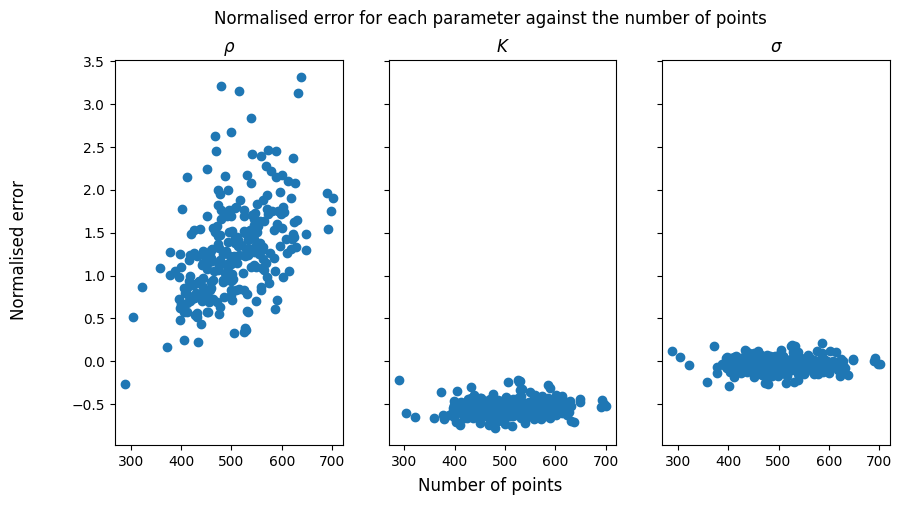

<Figure size 640x480 with 0 Axes>

In [64]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
ax1.scatter(params_2[:,3], (params_2[:,0] - rho)/rho); ax1.set_title(r"$\rho$");
ax2.scatter(params_2[:,3], (params_2[:,1] - K)/K); ax2.set_title(r"$K$");
ax3.scatter(params_2[:,3], (params_2[:,2] - sigma)/sigma); ax3.set_title(r"$\sigma$");
fig.supxlabel("Number of points"); fig.supylabel("Normalised error");
fig.suptitle("Normalised error for each parameter against the number of points");

# plt.savefig("Plots/Goodness of Fit Plots/normalised_diffs_scatter_2.pdf")
plt.show()
plt.clf()

### Some further diagnostics

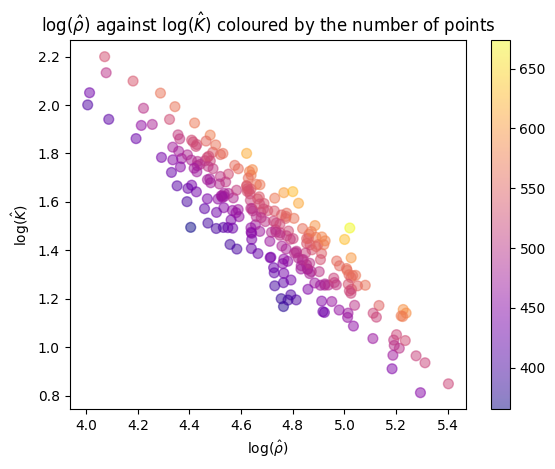

In [66]:
f, ax = plt.subplots();
points = ax.scatter(np.log(params_1[:,0]), np.log(params_1[:,1]), 
                    c=params_1[:,3], s=50, cmap="plasma",
                    alpha=0.5);
f.colorbar(points)
plt.xlabel(r"$\log(\hat{\rho})$"); plt.ylabel(r"$\log(\hat{K})$");
plt.title(r"""$\log(\hat{\rho})$ against $\log(\hat{K})$ coloured by the number of points""");

## Whittle vs MC

In [159]:
params_arr = np.array(
    [[25, 20, 0.03],
     [25, 50, 0.03],
     [25, 100, 0.03]
    ]
)
cov = np.array([[1, 0], [0, 1]])

### Whittle

In [162]:
# Instatiate class for Thomas process
tom = SPP_Thomas()

# List for parameters
params_wl = []

# Number of repetitions
N_w = int(250) 

for p_idx in range(len(params_arr)):
    print(f"Parameter set: {p_idx}")
    # Parameter values for this run
    rho = params_arr[p_idx, 0]
    K = params_arr[p_idx, 1]
    sigma = params_arr[p_idx, 2]
    
    # Array to store inferred params for this run
    params_iter = np.zeros((N_w, 6))
    for k in range(N_w):
        print(k)
        # if (((k+1) / 25) == ((k+1) // 25)):
        #     print(f"Run {k + 1} of {N_w}")

        # Simulate Thomas process
        spp = tom.simSPP(rho, K, sigma, cov, enlarge=1.25)
        params_iter[k, 3] = len(spp)
        twe = ThomasWhittleEstimator(spp, -16, 16, 1)

        # Compute randomised starting parameters
        init = np.array(
            [np.random.choice(np.arange(10, 100,1), 1)[0],
             np.random.choice(np.arange(0.01, 0.1, 0.01), 1)[0]]
        )
        params_iter[k,[4,5]] = init

        # Minimise the negative WL and store
        neg_ll = lambda x: -twe.computeLikelihood(rho=x[0], K=len(spp)/x[0], sigma=x[1])
        params_iter[k, [0,2]] = (twe.scipyOptimisation(neg_ll, init))
        params_iter[k, 1] = len(spp)/params_iter[k,0]
    params_wl.append(params_iter)

Parameter set: 0
0
1
2
3
4
5
6
7
8
9
10


/home/jc820/Documents/First Mini Project/Code/Spatial-Point-Processes/src/whittle_estimator.py:67: RuntimeWarning: invalid value encountered in log
  likelihood_eval[k] = (np.log(spectral_density) +


11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
Parameter set: 1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41


### MC

In [163]:
# Instatiate class for Thomas process
tom = SPP_Thomas()

# List for parameters
params_mc = []

# Number of repetitions
N_mc = int(250) 

# Set for grid search
rho_grid = np.arange(10, 120, 1)
sigma_grid = np.arange(0.01, 0.1, 0.01)

for p_idx in range(len(params_arr)):
    print(f"Parameter set: {p_idx}")
    # Parameter values for this run
    rho = params_arr[p_idx, 0]
    K = params_arr[p_idx, 1]
    sigma = params_arr[p_idx, 2]
    
    # Array to store inferred params for this run
    params_iter = np.zeros((N_mc, 4))
    for j in range(N_mc):
        if ((j / 50) == (j // 50)):
            print(f"Iteration: {j}")
        spp = tom.simSPP(rho, K, sigma, cov, enlarge=1.25)
        params_iter[j, 3] = len(spp)
        mct = MinimumContrastThomas(spp)
        samp_params_mc = mct.minimumContrastEstimate(
            rho_grid, sigma_grid
        )
        params_iter[j,[0,1,2]] = samp_params_mc
    params_mc.append(params_iter)

Parameter set: 0
Iteration: 0
Iteration: 50
Iteration: 100
Iteration: 150
Iteration: 200
Parameter set: 1
Iteration: 0
Iteration: 50
Iteration: 100
Iteration: 150
Iteration: 200
Parameter set: 2
Iteration: 0
Iteration: 50
Iteration: 100
Iteration: 150
Iteration: 200


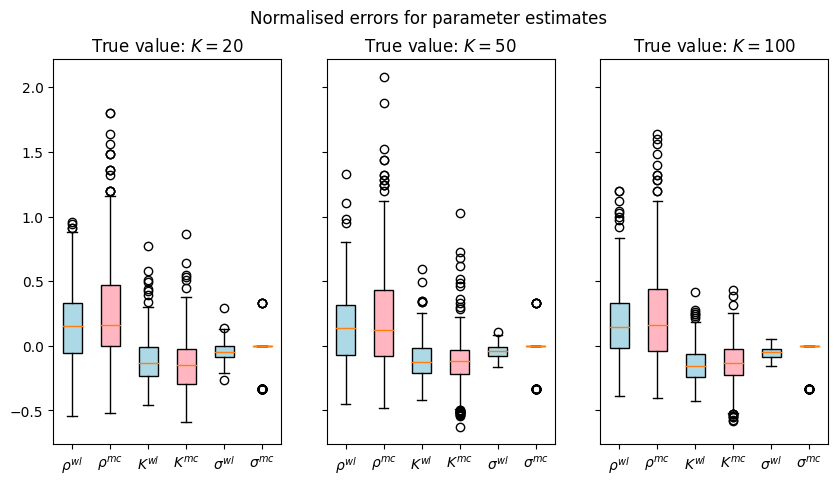

In [167]:
params_wl_1 = params_wl[0]; params_wl_2 = params_wl[1]; params_wl_3 = params_wl[2]

params_mc_1 = params_mc[0]; params_mc_2 = params_mc[1]; params_mc_3 = params_mc[2]

rho = 25; sigma = 0.03
K_1 = params_arr[0,1]; K_2 = params_arr[1,1]; K_3 = params_arr[2,1]


data1 = [(params_wl_1[:,0]- rho)/rho,
         (params_mc_1[:,0]- rho)/rho, 
         (params_wl_1[:,1]- K_1)/K_1,
         (params_mc_1[:,1] - K_1)/K_1,
         (params_wl_1[:,2] - sigma)/sigma,
         (params_mc_1[:,2] - sigma)/sigma]

data2 = [(params_wl_2[:,0]- rho)/rho,
         (params_mc_2[:,0]- rho)/rho, 
         (params_wl_2[:,1]- K_2)/K_2,
         (params_mc_2[:,1] - K_2)/K_2,
         (params_wl_2[:,2] - sigma)/sigma,
         (params_mc_2[:,2] - sigma)/sigma]

data3 = [(params_wl_3[:,0]- rho)/rho,
         (params_mc_3[:,0]- rho)/rho, 
         (params_wl_3[:,1]- K_3)/K_3,
         (params_mc_3[:,1] - K_3)/K_3,
         (params_wl_3[:,2] - sigma)/sigma,
         (params_mc_3[:,2] - sigma)/sigma]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
bplot1 = ax1.boxplot(data1, patch_artist=True)
bplot2 = ax2.boxplot(data2, patch_artist=True)
bplot3 = ax3.boxplot(data3, patch_artist=True)
# bplot4 = ax4.boxplot(data4, patch_artist=True)
# bplot5 = ax5.boxplot(data5, patch_artist=True)

for ax in (ax1, ax2, ax3):
    ax.set_xticks([1, 2, 3, 4, 5, 6],
           [r'$\rho^{wl}$',
            r'$\rho^{mc}$',
            r'$K^{wl}$',
            r'$K^{mc}$',
            r'$\sigma^{wl}$',
            r'$\sigma^{mc}$']);

ax1.set_title(r"True value: $K=20$")
ax2.set_title(r"True value: $K=50$")
ax3.set_title(r"True value: $K=100$")
# ax4.set_title(r"True value: $\sigma=0.05$")
# ax5.set_title(r"True value: $\sigma=0.1$")

# fill with colors
colors = ['lightblue', 'lightpink', 'lightblue', 'lightpink','lightblue', 'lightpink']
for bplot in (bplot1, bplot2, bplot3):
    for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)
            
# plt.ylim([-1,4])
fig.suptitle("""Normalised errors for parameter estimates""");
plt.savefig("Plots/Goodness of Fit Plots/constant_rho_sigma_boxplots1.pdf")

In [156]:
import pickle

with open('params_mc.pkl','wb') as f:
     pickle.dump(params_mc, f)  